<a href="https://colab.research.google.com/github/vishesh9131/data_science_projects/blob/main/indian_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score



# EDA

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.duplicated().sum()

0

# visulization

In [ ]:
count_diabetes=df['Outcome'].value_counts()
count_diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

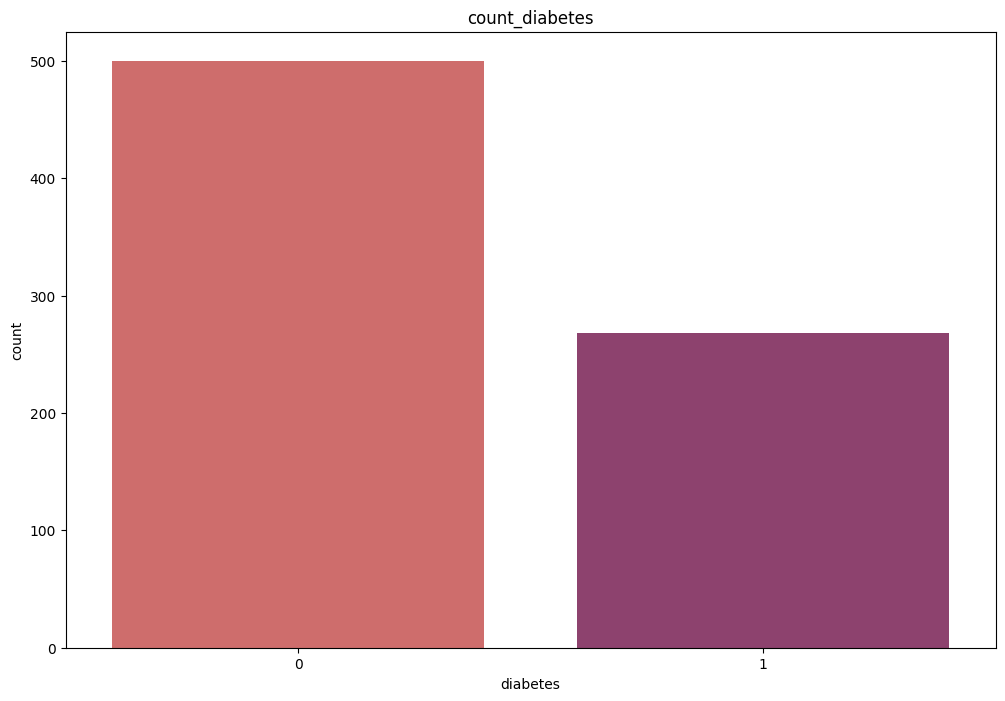

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_diabetes.index,y=count_diabetes.values,palette='flare')
plt.title('count_diabetes')
plt.xlabel('diabetes')
plt.ylabel('count')
plt.show()

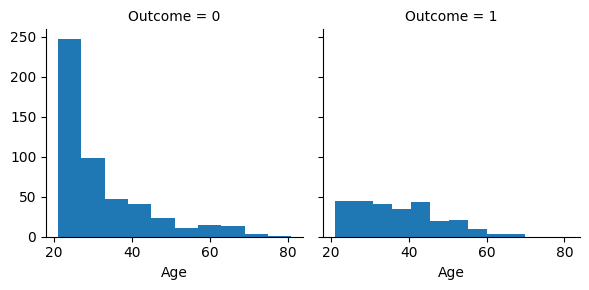

In [ ]:
age=sns.FacetGrid(df,col='Outcome')
age.map(plt.hist,'Age')

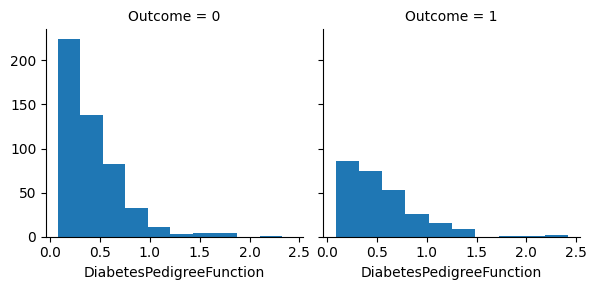

In [ ]:
DiabetesPedigreeFunction=sns.FacetGrid(df,col='Outcome')
DiabetesPedigreeFunction.map(plt.hist,'DiabetesPedigreeFunction')

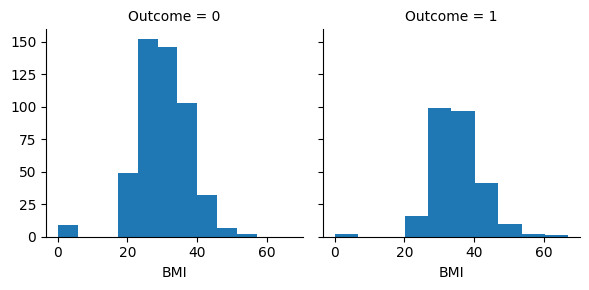

In [ ]:
BMI=sns.FacetGrid(df,col='Outcome')
BMI.map(plt.hist,'BMI')

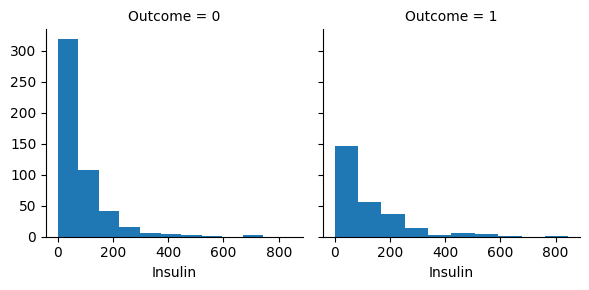

In [ ]:
Insulin=sns.FacetGrid(df,col='Outcome')
Insulin.map(plt.hist,'Insulin')

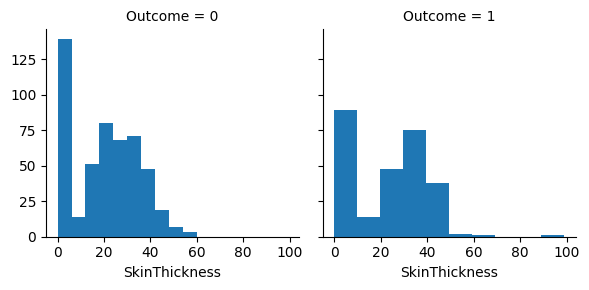

In [ ]:
SkinThickness=sns.FacetGrid(df,col='Outcome')
SkinThickness.map(plt.hist,'SkinThickness')

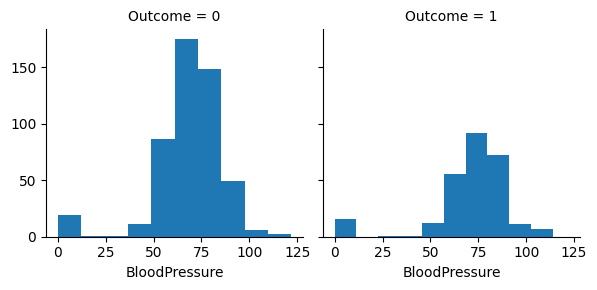

In [ ]:
BloodPressure=sns.FacetGrid(df,col='Outcome')
BloodPressure.map(plt.hist,'BloodPressure')

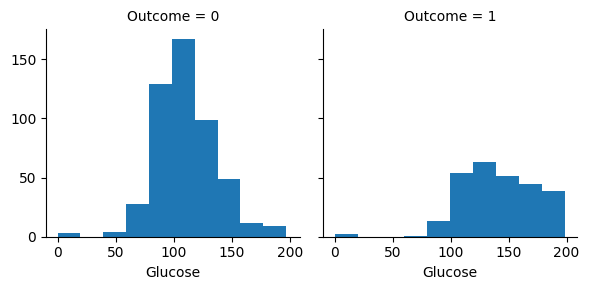

In [ ]:
Glucose=sns.FacetGrid(df,col='Outcome')
Glucose.map(plt.hist,'Glucose')

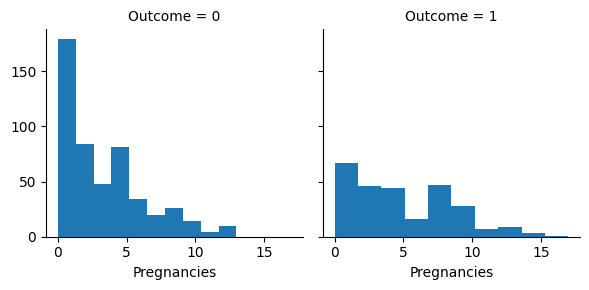

In [ ]:
Pregnancies=sns.FacetGrid(df,col='Outcome')
Pregnancies.map(plt.hist,'Pregnancies')

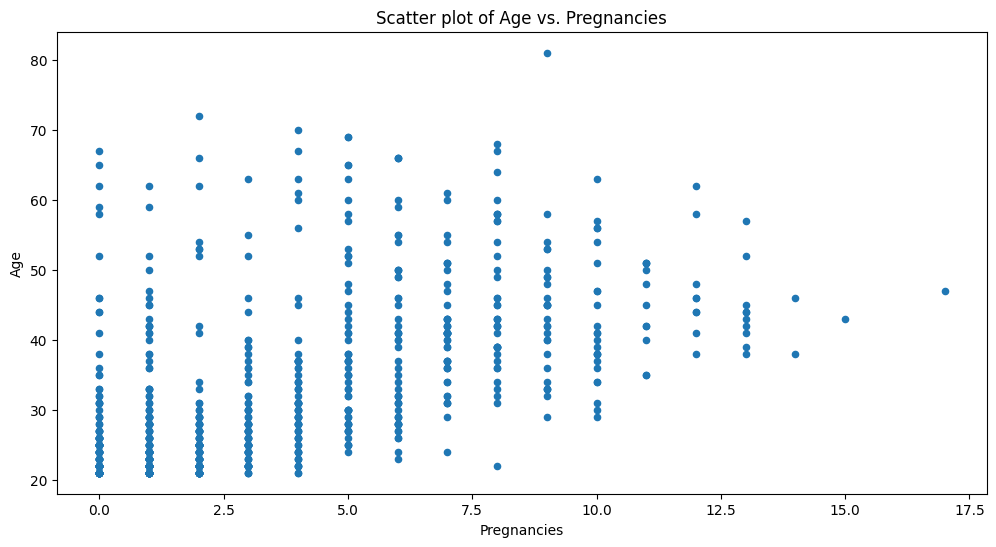

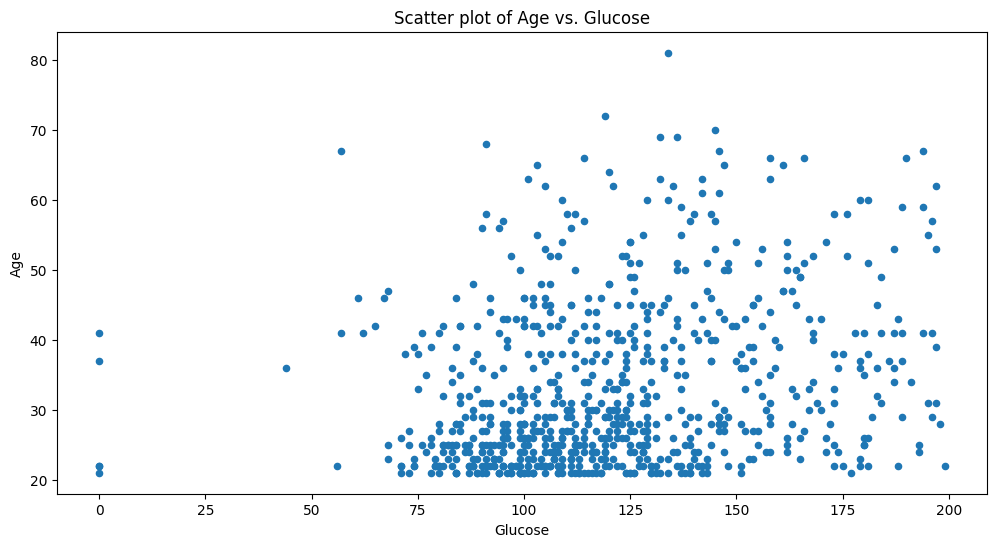

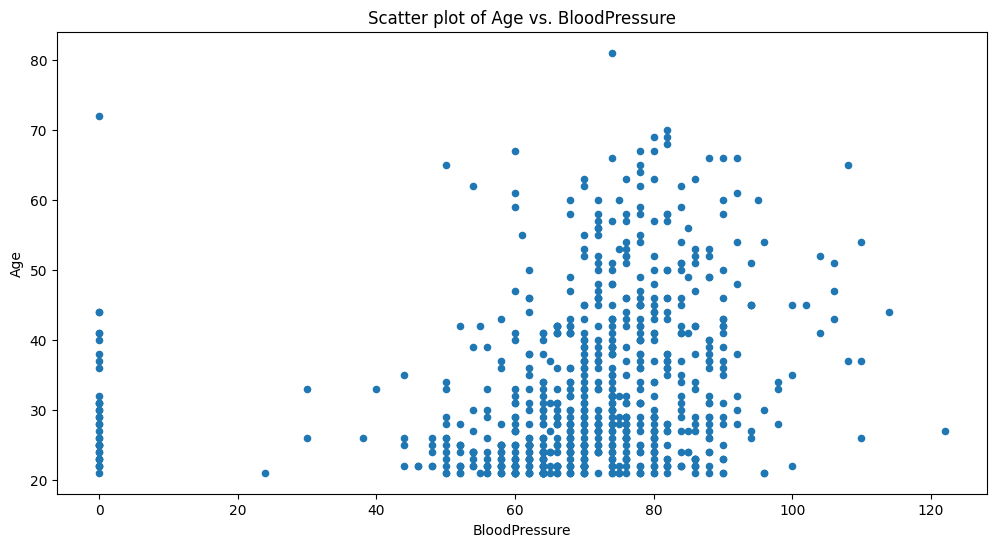

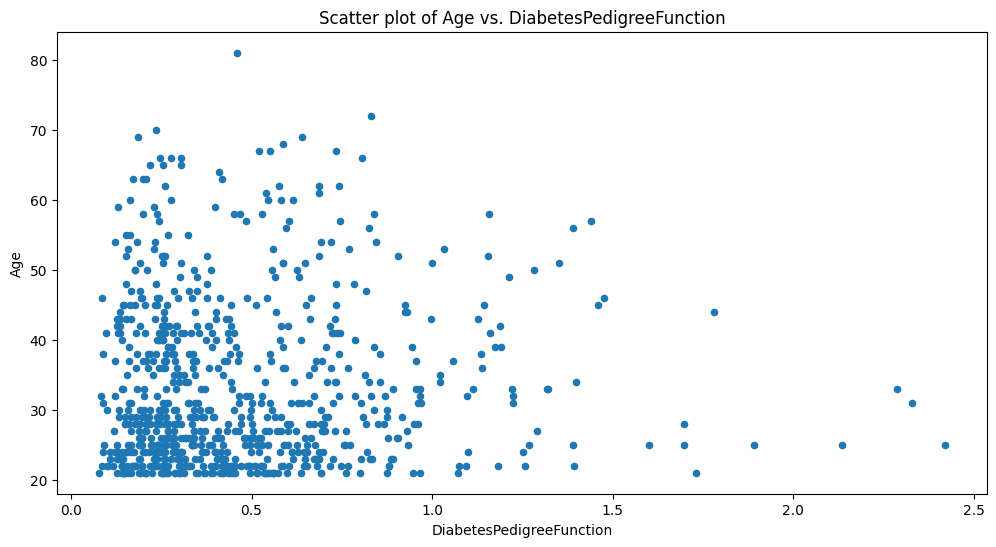

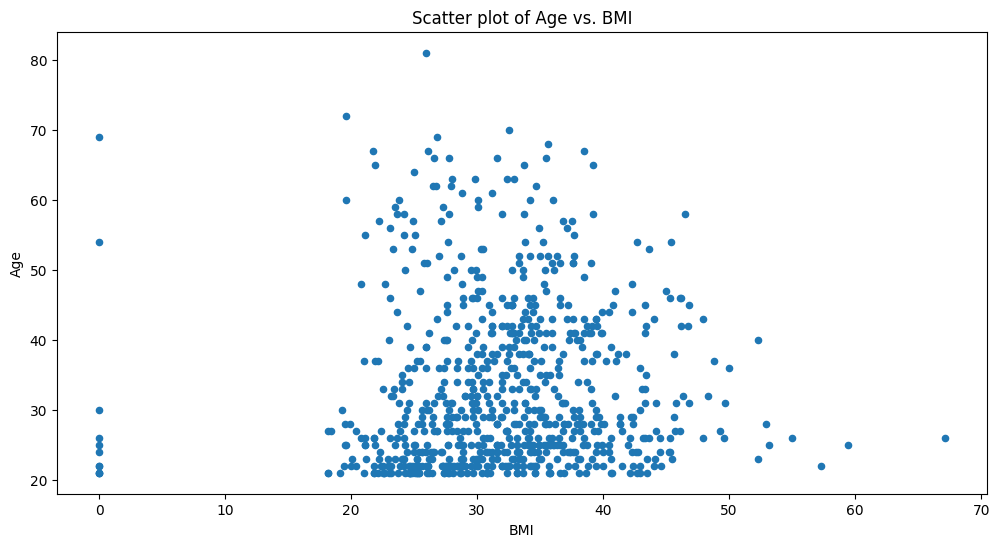

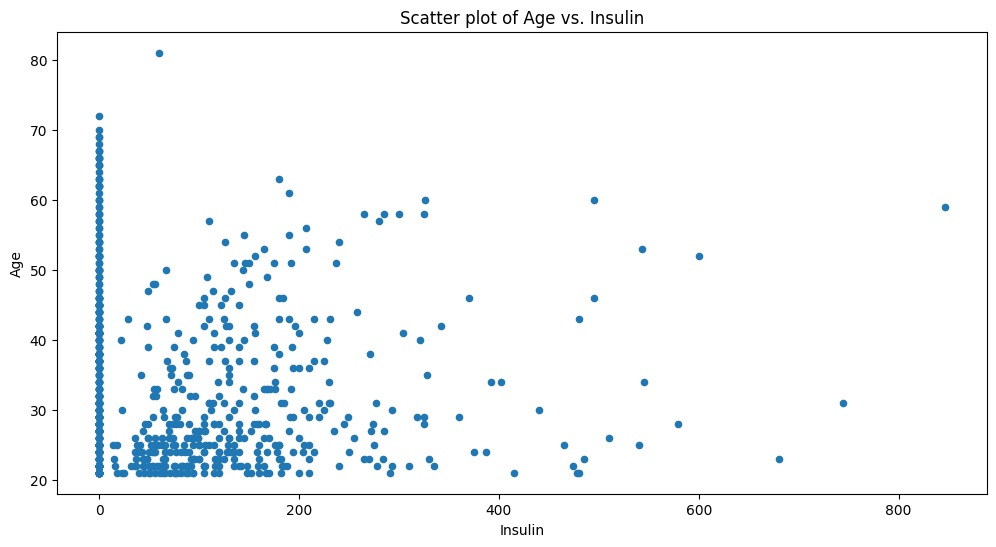

In [ ]:
def plot_scatter(df, cols, col_y = 'Age'):
    for col in cols:
        fig = plt.figure(figsize=(12,6)) # define plot area
        ax = fig.gca() # define axis
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction','BMI','Insulin']
plot_scatter(df, num_cols)

Text(0.5, 1.0, 'Box Plot')

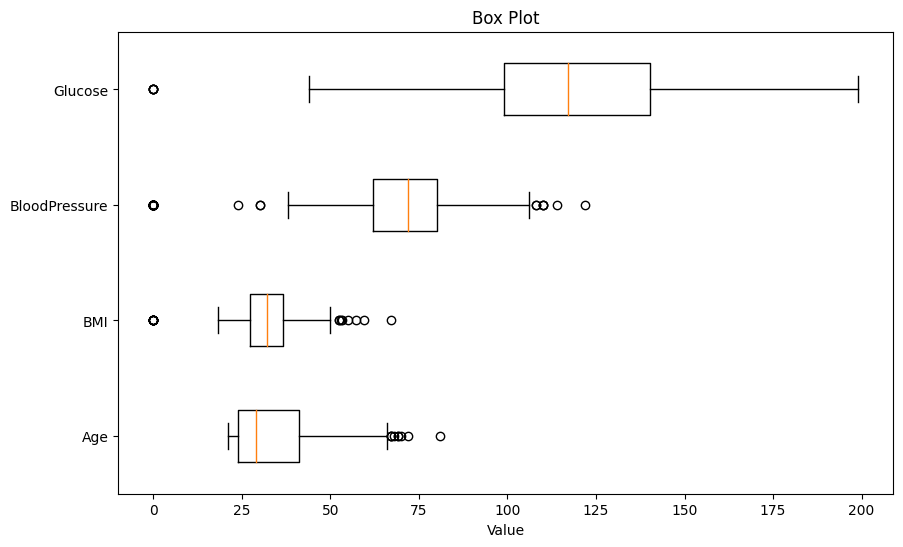

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([df['Age'], df['BMI'], df['BloodPressure'], df['Glucose']], vert=False)
plt.yticks([1, 2, 3, 4], ['Age', 'BMI', 'BloodPressure', 'Glucose'])
plt.xlabel('Value')
plt.title("Box Plot")

# corr

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


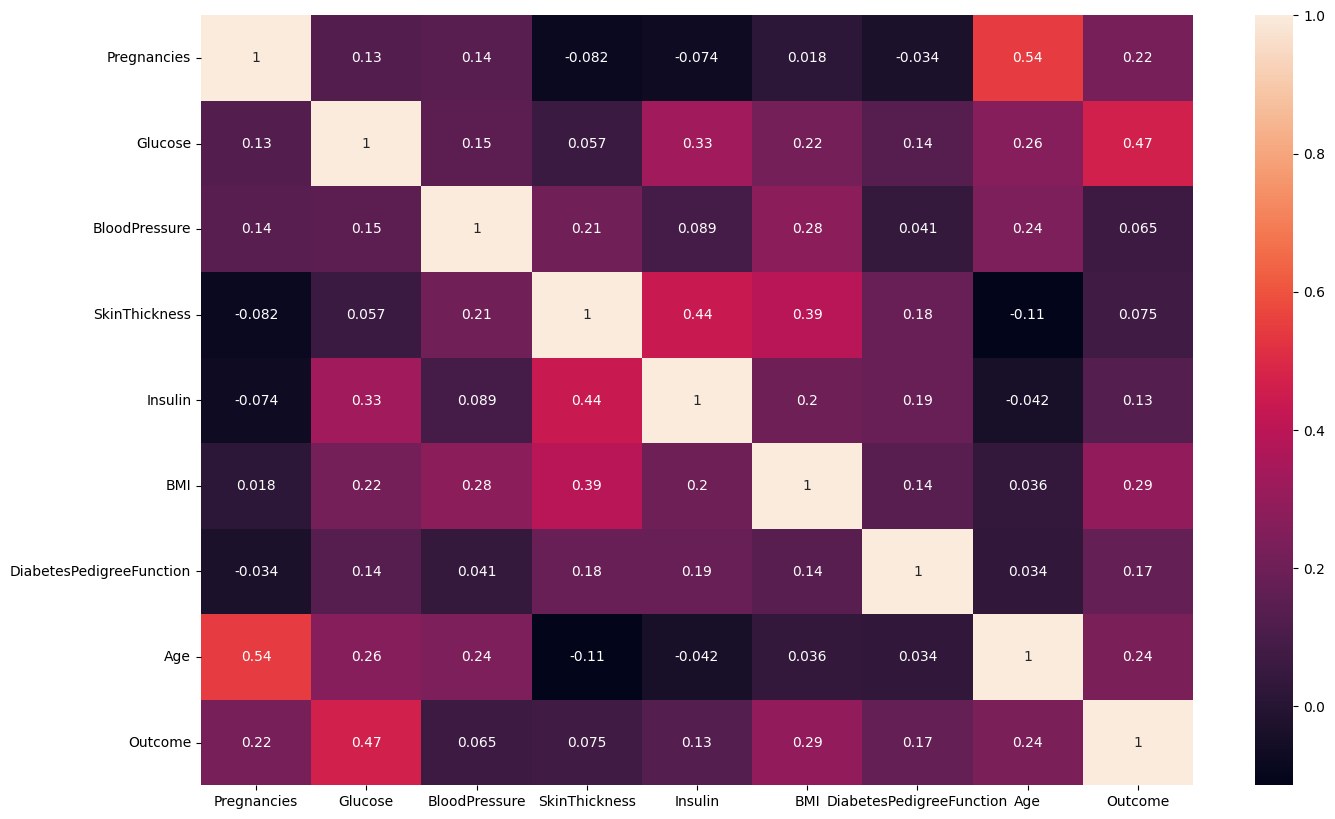

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# define features and target

In [ ]:
X=df.iloc[:,:-1]
y=df['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y=y.values.reshape(-1,1)

# Data scaling

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# split data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

# models

### 1-logistic regression

In [ ]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
lg.score(X_train,y_train)

0.754071661237785

In [ ]:
y_pred=lg.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7662337662337663


[[86 13]
 [23 32]]


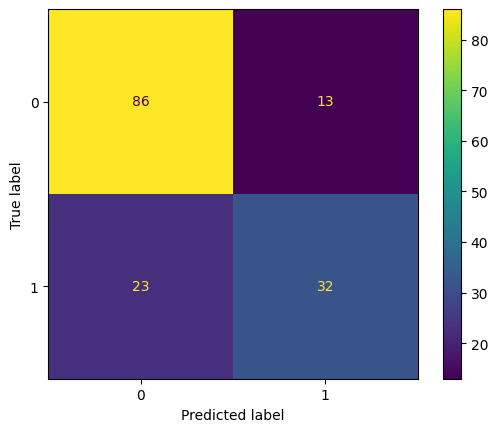

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



### 2-Decision tree

In [ ]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
Dt.score(X_train,y_train)

1.0

In [ ]:
y_pred=Dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


[[76 23]
 [15 40]]


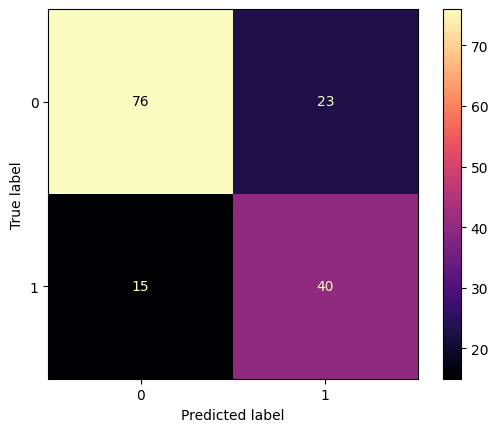

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



### 3-RandomForestClassifier

In [ ]:
Rf=RandomForestClassifier(n_estimators=1000)
Rf.fit(X_train,y_train)

/tmp/ipykernel_17/3228244411.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [ ]:
Rf.score(X_train,y_train)

1.0

In [ ]:
y_pred=Rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7337662337662337


[[78 21]
 [20 35]]


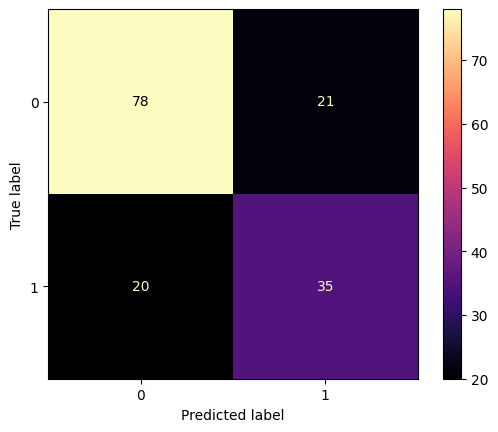

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



### 4-SVC

In [ ]:
svm = SVC(kernel="rbf", C=1.0)
svm.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svm.score(X_train, y_train)

0.7947882736156352

In [ ]:
y_pre=svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pre))

0.7467532467532467


[[82 17]
 [22 33]]


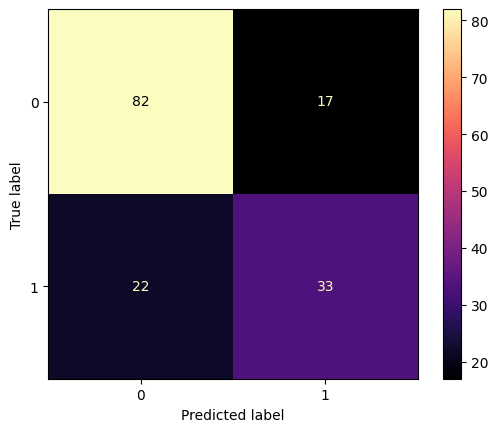

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pre,cmap="magma")
print(confusion_matrix(y_test, y_pre))

### 5-VotingClassifier

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression()))
estimator.append(('SVC', SVC(gamma ='auto', C=5)))
estimator.append(('DTC', DecisionTreeClassifier()))

vot = VotingClassifier(estimators=estimator, voting='hard')
vot.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(C=5, gamma='auto')),
                             ('DTC', DecisionTreeClassifier())])

In [ ]:
print(vot.score(X_train, y_train))

0.7736156351791531


In [ ]:
print(vot.score(X_test, y_test))

0.7922077922077922


### 6-CatBoostClassifier

In [ ]:
catboost_clf = CatBoostClassifier(iterations=5000, depth=5, learning_rate=0.001, random_state=0)
catboost_clf.fit(X_train, y_train)

0:	learn: 0.6926283	total: 62.1ms	remaining: 5m 10s
1:	learn: 0.6921277	total: 64.4ms	remaining: 2m 41s
2:	learn: 0.6917080	total: 66.1ms	remaining: 1m 50s
3:	learn: 0.6913242	total: 67.5ms	remaining: 1m 24s
4:	learn: 0.6908431	total: 69.2ms	remaining: 1m 9s
5:	learn: 0.6904234	total: 70.6ms	remaining: 58.7s
6:	learn: 0.6898989	total: 72ms	remaining: 51.4s
7:	learn: 0.6893650	total: 73.4ms	remaining: 45.8s
8:	learn: 0.6888133	total: 74.8ms	remaining: 41.5s
9:	learn: 0.6884082	total: 76ms	remaining: 37.9s
10:	learn: 0.6879810	total: 77.1ms	remaining: 35s
11:	learn: 0.6873640	total: 78.1ms	remaining: 32.5s
12:	learn: 0.6867728	total: 79.2ms	remaining: 30.4s
13:	learn: 0.6862498	total: 80.3ms	remaining: 28.6s
14:	learn: 0.6856886	total: 81.3ms	remaining: 27s
15:	learn: 0.6852978	total: 82.3ms	remaining: 25.6s
16:	learn: 0.6848315	total: 83.4ms	remaining: 24.4s
17:	learn: 0.6843136	total: 84.5ms	remaining: 23.4s
18:	learn: 0.6838813	total: 85.5ms	remaining: 22.4s
19:	learn: 0.6833482	total

In [ ]:
print(catboost_clf.score(X_test, y_test))

0.538961038961039


In [ ]:
y_pred=catboost_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7467532467532467


[[79 20]
 [19 36]]


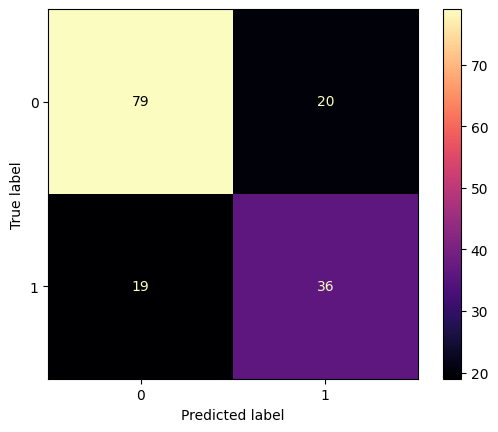

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

### 7-Light Gradient Boosting

In [ ]:
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
lgbm.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=42)

In [ ]:
print(lgbm.score(X_train, y_train))

1.0


In [ ]:
y_pred=lgbm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7207792207792207


[[74 25]
 [18 37]]


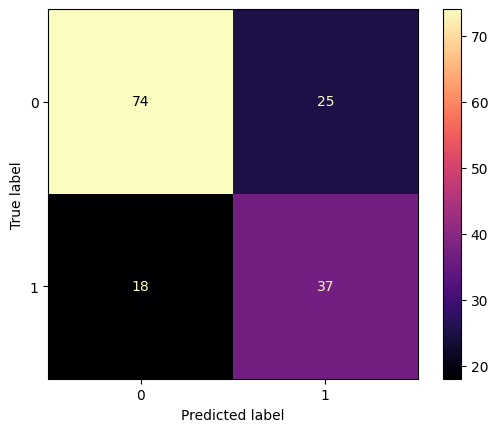

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))